In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv("DoctorVisits-DA.csv")

In [4]:
df.head(10)

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
5,6,1,female,0.19,0.35,5,1,9,no,no,no,yes,no
6,7,1,female,0.19,0.55,4,0,2,no,no,no,no,no
7,8,1,female,0.19,0.15,3,0,6,no,no,no,no,no
8,9,1,female,0.19,0.65,2,0,5,yes,no,no,no,no
9,10,1,male,0.19,0.15,1,0,0,yes,no,no,no,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


In [6]:
df['illness'].value_counts()

illness
1    1638
0    1554
2     946
3     542
4     274
5     236
Name: count, dtype: int64

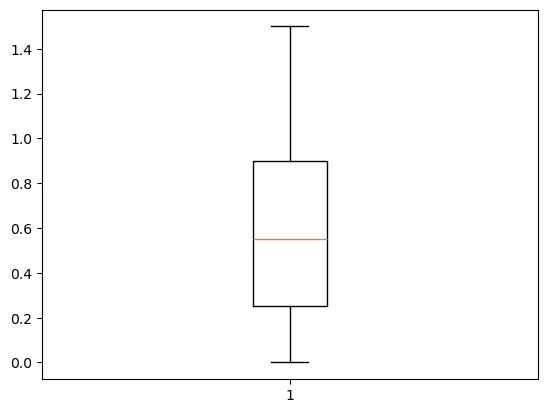

In [7]:
#Visualization of maximum, minimum and medium income
y=list(df.income)
plt.boxplot(y)
plt.show()

In [9]:
#Number of Duplicates found in the dataset
duplicates=df.duplicated().sum()
print("Number of duplicates ",duplicates)

Number of duplicates  0


In [10]:
#Number of people based on their count of illness
illness_count = df.groupby('illness').size()
print(illness_count)

illness
0    1554
1    1638
2     946
3     542
4     274
5     236
dtype: int64


In [11]:
#Gender-wise illness count
gender_illness = df.groupby('gender')['illness'].sum()
print(gender_illness)

gender
female    4353
male      3079
Name: illness, dtype: int64


In [12]:
#Maximum, Minimum and Median income of people
max_income = df['income'].max()
min_income = df['income'].min()
median_income = df['income'].median()
print(f"Max Income: {max_income}, Min Income: {min_income}, Median Income: {median_income}")

Max Income: 1.5, Min Income: 0.0, Median Income: 0.55


In [13]:
#Days of reduced activity due to illness for males and females separately
reduced_activity = df.groupby('gender')['reduced'].sum()
print(reduced_activity)


gender
female    2636
male      1837
Name: reduced, dtype: int64


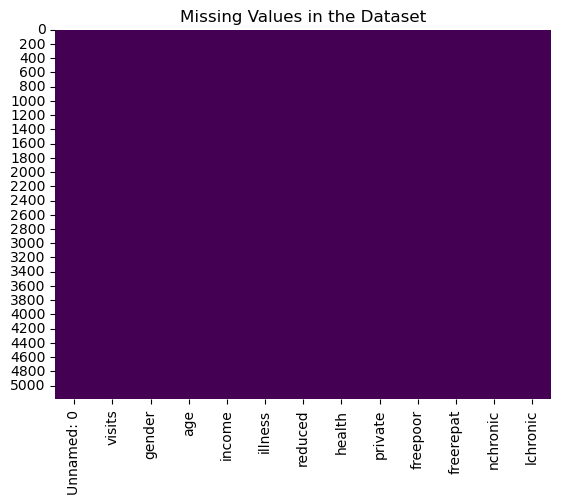

In [14]:
#heat map

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in the Dataset")
plt.show()

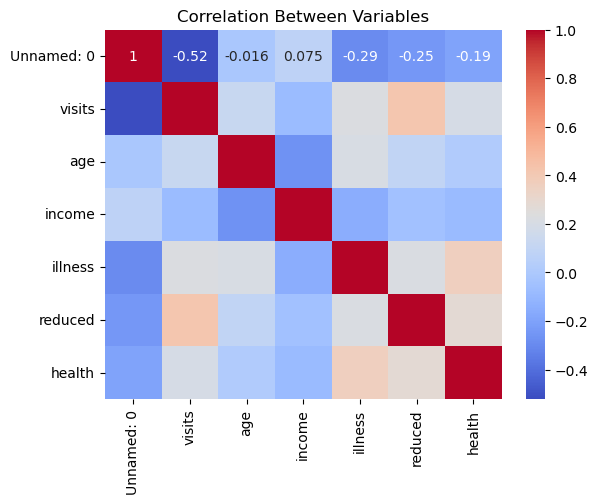

In [17]:
#Correlation between variables and identiying strongly correlated variables
numeric_df=df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Variables")
plt.show()

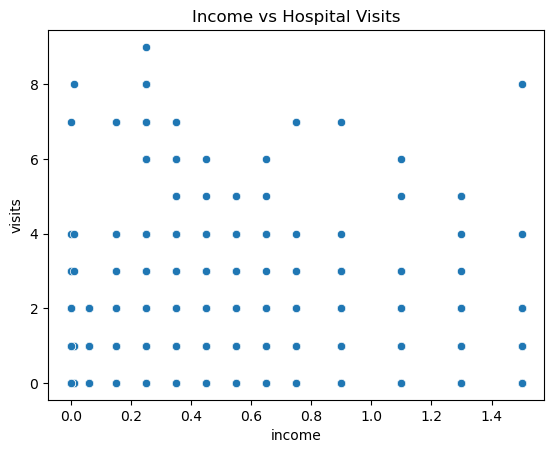

In [18]:
#Analysis of how income affects the number of hospital visits
sns.scatterplot(data=df, x='income', y='visits')
plt.title("Income vs Hospital Visits")
plt.show()

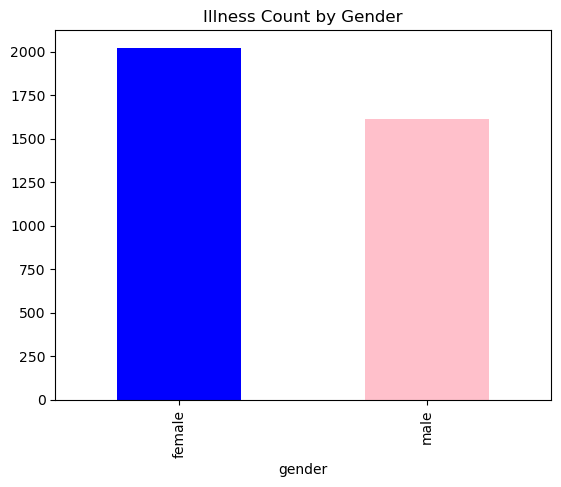

In [19]:
#Count and visualize the number of males and females affected by illness
illness_by_gender = df[df['illness'] > 0].groupby('gender').size()
illness_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title("Illness Count by Gender")
plt.show()

Govt Insurance (Low Income): 4.277456647398844%
Govt Insurance (Old Age): 21.021194605009633%
Private Insurance: 44.27745664739884%


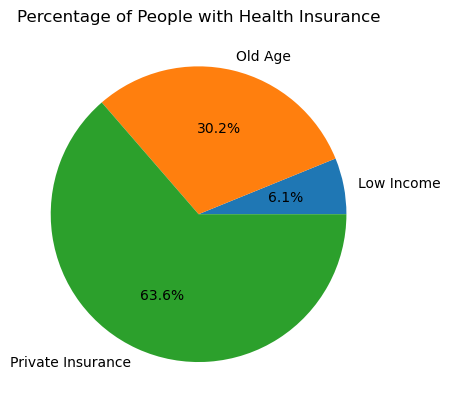

In [21]:
#Visualize the percentage of people getting govt. health insurance due to low income due to old age
total_people = df.shape[0]
freepoor_percentage = df['freepoor'].value_counts(normalize=True).get('yes', 0) * 100
freerepat_percentage = df['freerepat'].value_counts(normalize=True).get('yes', 0) * 100
private_insurance_percentage = df['private'].value_counts(normalize=True).get('yes', 0) * 100

print(f"Govt Insurance (Low Income): {freepoor_percentage}%")
print(f"Govt Insurance (Old Age): {freerepat_percentage}%")
print(f"Private Insurance: {private_insurance_percentage}%")

insurance_data = {'Low Income': freepoor_percentage, 'Old Age': freerepat_percentage, 'Private Insurance': private_insurance_percentage}
plt.pie(insurance_data.values(), labels=insurance_data.keys(), autopct='%1.1f%%')
plt.title("Percentage of People with Health Insurance")
plt.show()


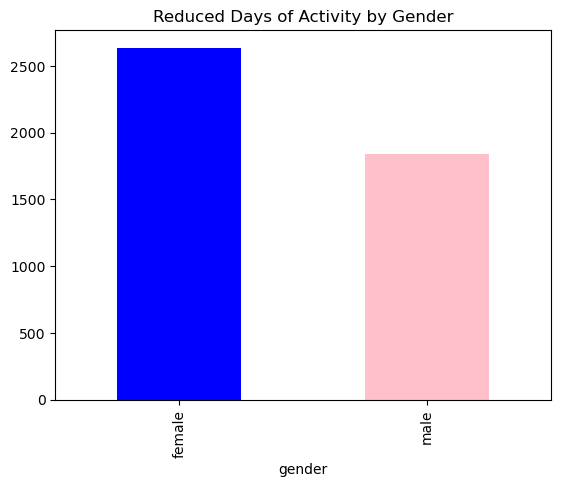

In [22]:
#Bar chart of reduced days of activity due to illness by gender
reduced_by_gender = df.groupby('gender')['reduced'].sum()
reduced_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title("Reduced Days of Activity by Gender")
plt.show()


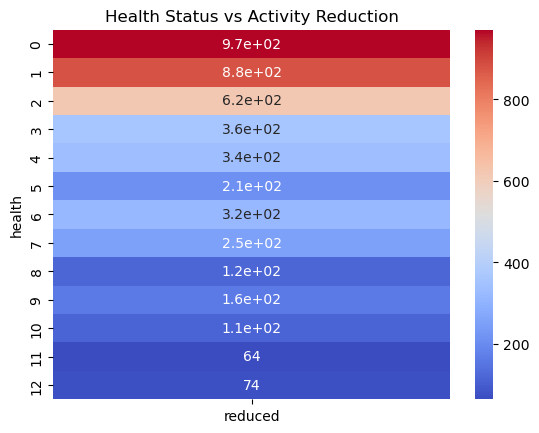

In [23]:
#Relation between health status and activity reduction
health_activity_data = df.pivot_table(index='health', values='reduced', aggfunc='sum')
sns.heatmap(health_activity_data, annot=True, cmap='coolwarm')
plt.title("Health Status vs Activity Reduction")
plt.show()